In [35]:
##### import sys
from time import time
import numpy as np
import pandas as pd
import os.path
from os import path
from scenario import Scenario
from sir_model import EpidemicModel, patient_zeros_states, symptomatic_individuals
# SIR parameters
location="networks"
N=500000
## new try with 100 spreaders
N_patient_zero = 200;
lamb = 0.05;
mu = 0.02;
scale=1.0; # Easy Case
T=100;
t1 = 10;
# trac parameters
trac_tau = 5;
# MF parameters
MF_taus = [5];
MF_deltas = [15];
# observation parameters
n_rankings = [1500]#, 100, 150, 200]
#seeds=[2]
#n_rankings = [150]
seeds=[123,32,456]
#seed = int(sys.argv[2]);
#seeds for running [32,123,456]
#seed=int(sys.argv[1]);
################################################
n_ranking = n_rankings[0]
MF_tau = MF_taus[0];
MF_delta = MF_deltas[0];

scenario_rnds = {}
scenario_tracs = {}
scenario_MFs = {}
scenario_BPs = {}

for seed in seeds:
    #no_int = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed), sep="\t")
    scenario_rnds[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_rnd.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking), sep="\t")
    scenario_tracs[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_trac_t%d.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau), sep="\t")
    scenario_MFs[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_MF_t%d_d%d.csv"%(N/1000,T,t1,
                                                                                                                    N_patient_zero,mu,lamb,seed,n_ranking,MF_tau,MF_delta), sep="\t")
    scenario_BPs[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_bp%d_no_tau.csv"%(N,T,t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau)
                      , sep="\t")

#scenario_BP_tau = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_bp%d_tau.csv"%(N,T,t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau)
#              , sep="\t")

scenario_rnd = scenario_rnds[seeds[0]].copy()
scenario_trac = scenario_tracs[seeds[0]].copy()
scenario_MF = scenario_MFs[seeds[0]].copy()
scenario_BP = scenario_BPs[seeds[0]].copy()
for seed in seeds[1:]:
    scenario_rnd += scenario_rnds[seed]
    scenario_trac += scenario_tracs[seed]
    scenario_MF += scenario_MFs[seed]
    scenario_BP += scenario_BPs[seed]
scenario_rnd/=len(seeds)
scenario_trac/=len(seeds)
scenario_MF/=len(seeds)
scenario_BP/=len(seeds)


Text(0.5, 1.0, 'Proximity 500K')

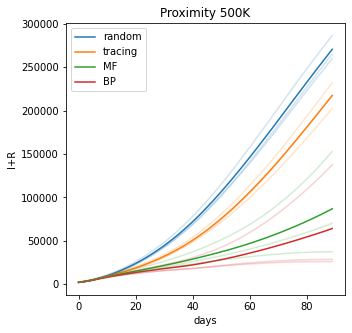

In [51]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
alpha = 0.2
alpha1 = 1
ax = scenario_rnd[["I", "R"]].sum(axis=1).plot(ax = axs, label="rnd", 
                                                      color=colors[0], alpha = alpha1)
ax = scenario_trac[["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_trac", 
                                                       color=colors[1], alpha = alpha1)
ax = scenario_MF[["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_MF", 
                                                     color=colors[2], alpha = alpha1)
ax = scenario_BP[["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_BP", 
                                                     color=colors[3], alpha = alpha1)

for seed in seeds:
    ax = scenario_rnds[seed][["I", "R"]].sum(axis=1).plot(ax = axs, label="rnd", 
                                                          color=colors[0], alpha = alpha)
    ax = scenario_tracs[seed][["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_trac", 
                                                           color=colors[1], alpha = alpha)
    ax = scenario_MFs[seed][["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_MF", 
                                                         color=colors[2], alpha = alpha)
    ax = scenario_BPs[seed][["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_BP", 
                                                         color=colors[3], alpha = alpha)

ax.legend(["random", "tracing", "MF", "BP"]);
ax.set_ylabel("I+R")
ax.set_xlabel("days")
ax.set_title("Proximity 500K")

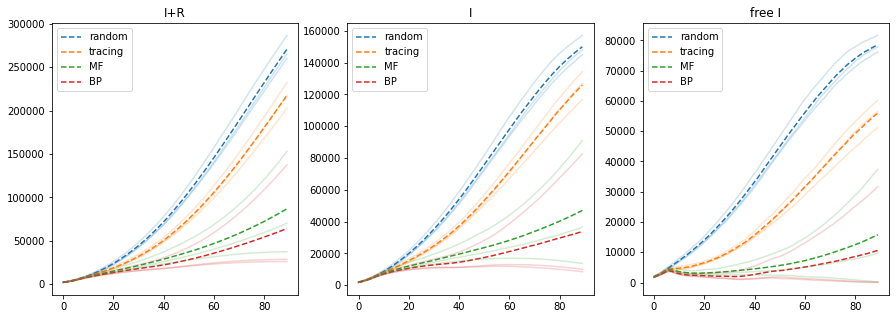

In [61]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
alpha = 0.2
alpha1 = 1
ls="--"

ax = scenario_rnd[["I", "R"]].sum(axis=1).plot(ax = axs[0], label="rnd", 
                                                      color=colors[0], alpha = alpha1, ls=ls)
ax = scenario_trac[["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_trac", 
                                                       color=colors[1], alpha = alpha1, ls=ls)
ax = scenario_MF[["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_MF", 
                                                     color=colors[2], alpha = alpha1, ls=ls)
ax = scenario_BP[["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_BP", 
                                                     color=colors[3], alpha = alpha1, ls=ls)
ax.legend(["random", "tracing", "MF", "BP"]);
ax.set_title("I+R")

for seed in seeds:
    ax = scenario_rnds[seed][["I", "R"]].sum(axis=1).plot(ax = axs[0], label="rnd", 
                                                          color=colors[0], alpha = alpha,legend=False)
    ax = scenario_tracs[seed][["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_trac", 
                                                           color=colors[1], alpha = alpha,legend=False)
    ax = scenario_MFs[seed][["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_MF", 
                                                         color=colors[2], alpha = alpha,legend=False)
    ax = scenario_BPs[seed][["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_BP", 
                                                         color=colors[3], alpha = alpha,legend=False)
ax = scenario_rnd[["I"]].plot(ax = axs[1], label="rnd", 
                                                      color=colors[0], alpha = alpha1,legend=False, ls=ls)
ax = scenario_trac[["I"]].plot(ax=ax, label="scenario_trac", 
                                                       color=colors[1], alpha = alpha1,legend=False, ls=ls)
ax = scenario_MF[["I"]].plot(ax=ax, label="scenario_MF", 
                                                     color=colors[2], alpha = alpha1,legend=False, ls=ls)
ax = scenario_BP[["I"]].plot(ax=ax, label="scenario_BP", 
                                                     color=colors[3], alpha = alpha1,legend=False, ls=ls)

ax.legend(["random", "tracing", "MF", "BP"]);
ax.set_title("I")

for seed in seeds:
    ax = scenario_rnds[seed][["I"]].plot(ax = axs[1], label="rnd", 
                                                          color=colors[0], alpha = alpha,legend=False)
    ax = scenario_tracs[seed][["I"]].plot(ax=ax, label="scenario_trac", 
                                                           color=colors[1], alpha = alpha,legend=False)
    ax = scenario_MFs[seed][["I"]].plot(ax=ax, label="scenario_MF", 
                                                         color=colors[2], alpha = alpha,legend=False)
    ax = scenario_BPs[seed][["I"]].plot(ax=ax, label="scenario_BP", 
                                                         color=colors[3], alpha = alpha,legend=False)
q = "free_birds"

ax = scenario_rnd[[q]].plot(ax = axs[2], label="rnd", 
                                                      color=colors[0], alpha = alpha1,legend=False, ls=ls)
ax = scenario_trac[[q]].plot(ax=ax, label="scenario_trac", 
                                                       color=colors[1], alpha = alpha1,legend=False, ls=ls)
ax = scenario_MF[[q]].plot(ax=ax, label="scenario_MF", 
                                                     color=colors[2], alpha = alpha1,legend=False, ls=ls)
ax = scenario_BP[[q]].plot(ax=ax, label="scenario_BP", 
                                                     color=colors[3], alpha = alpha1,legend=False, ls=ls)
, ls=ls
ax.legend(["random", "tracing", "MF", "BP"]);

ax.set_title("free I")

for seed in seeds:
    ax = scenario_rnds[seed][[q]].plot(ax = axs[2], label="rnd", 
                                                          color=colors[0], alpha = alpha,legend=False)
    ax = scenario_tracs[seed][[q]].plot(ax=ax, label="scenario_trac", 
                                                           color=colors[1], alpha = alpha,legend=False)
    ax = scenario_MFs[seed][[q]].plot(ax=ax, label="scenario_MF", 
                                                         color=colors[2], alpha = alpha,legend=False)
    ax = scenario_BPs[seed][[q]].plot(ax=ax, label="scenario_BP", 
                                                         color=colors[3], alpha = alpha,legend=False)

